В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [3]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [4]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


НМК

In [5]:
def nmk_solution(X, y):
  return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [6]:
#RMSE якщо не можна використовувати вбудовану функцію зі sklearn
def rmse_custom(y_true, y_hat):
  return np.sqrt(sum((y_true - y_hat) ** 2)/y.shape[0])[0]

In [38]:
X = np.expand_dims(non_smoker_df['age'].to_numpy(), axis = 1)
y = np.expand_dims(non_smoker_df['charges'].to_numpy(), axis = 1)

In [8]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [9]:
theta_nmk = nmk_solution(X_with_intercept, y)
theta_nmk

array([[-2091.42055657],
       [  267.24891283]])

In [10]:
y_hat_nmk = np.dot(X_with_intercept, theta_nmk)
y_hat_nmk

array([[2719.0598744 ],
       [5391.54900271],
       [6727.79356686],
       ...,
       [2719.0598744 ],
       [2719.0598744 ],
       [3520.80661289]])

In [11]:
mean_squared_error(y, y_hat_nmk,squared = False)

4662.505766636395

In [12]:
rmse_custom(y, y_hat_nmk)

4662.505766636393

Full-Batch

In [13]:
def full_batch(X, y, lr, epochs):
  theta = np.random.rand(2).reshape(X.shape[1], 1)
  n = len(y)
  error = []
  for _ in range(epochs):
    theta = theta - lr * ((1 / n) * X.T.dot(X.dot(theta) - y))
    #error.append(sum((X.dot(theta) - y) ** 2))
    error.append(sum((X.dot(theta) - y).T.dot(X.dot(theta) - y)))
  return theta, error


In [14]:
theta_batch_01, error_batch_01 = full_batch(X_with_intercept, y, 0.01, 1000)
print('Theta\n',theta_batch_01)
print('lr = 0.01 first 5 epochs error:\n', error_batch_01[:5])
print('lr = 0.01 last 5 epochs error:\n', error_batch_01[-5:])

Theta
 [[nan]
 [nan]]
lr = 0.01 first 5 epochs error:
 [array([2.45070827e+13]), array([6.66763709e+15]), array([1.81580281e+18]), array([4.94500736e+20]), array([1.34668247e+23])]
lr = 0.01 last 5 epochs error:
 [array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]


<ipython-input-13-63e095bdd610>:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - lr * ((1 / n) * X.T.dot(X.dot(theta) - y))


In [15]:
theta_batch_0001, error_batch_0001 = full_batch(X_with_intercept, y, 0.001, 1000)
print('Theta\n',theta_batch_0001)
print('lr = 0.001 first 5 epochs error:\n', error_batch_0001[:5])
print('lr = 0.001 last 5 epochs error:\n', error_batch_0001[-5:])

Theta
 [[-219.38836424]
 [ 225.09900927]]
lr = 0.001 first 5 epochs error:
 [array([7.41517507e+10]), array([5.20801846e+10]), array([3.96566747e+10]), array([3.26637816e+10]), array([2.87276283e+10])]
lr = 0.001 last 5 epochs error:
 [array([2.35530092e+10]), array([2.35529135e+10]), array([2.35528178e+10]), array([2.35527221e+10]), array([2.35526265e+10])]


In [16]:
theta_batch_0001, error_batch_0001 = full_batch(X_with_intercept, y, 0.001, 100000)
print('Theta\n',theta_batch_0001)
print('lr = 0.001 (100K epochs) first 5 epochs error:\n', error_batch_0001[:5])
print('lr = 0.001 (100K epochs) last 5 epochs error:\n', error_batch_0001[-5:])

Theta
 [[-2091.39518573]
 [  267.24834159]]
lr = 0.001 (100K epochs) first 5 epochs error:
 [array([7.3999342e+10]), array([5.19944363e+10]), array([3.96084477e+10]), array([3.26366742e+10]), array([2.87124086e+10])]
lr = 0.001 (100K epochs) last 5 epochs error:
 [array([2.31302535e+10]), array([2.31302535e+10]), array([2.31302535e+10]), array([2.31302535e+10]), array([2.31302535e+10])]


In [17]:
y_hat_full_batch = np.dot(X_with_intercept, theta_batch_0001)
y_hat_full_batch

array([[2719.07496292],
       [5391.55837884],
       [6727.8000868 ],
       ...,
       [2719.07496292],
       [2719.07496292],
       [3520.8199877 ]])

In [18]:
mean_squared_error(y, y_hat_full_batch,squared = False)

4662.5057666442135

In [19]:
rmse_custom(y, y_hat_full_batch)

4662.505766644214

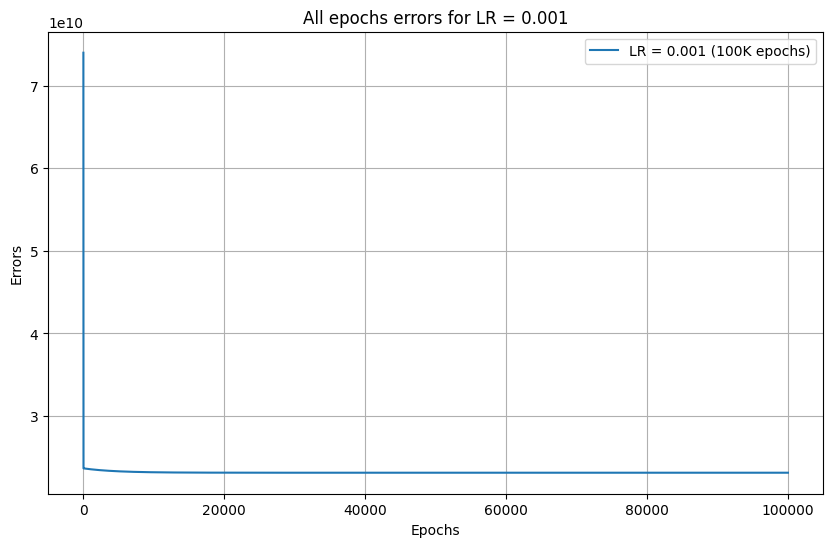

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(error_batch_0001, label = 'LR = 0.001 (100K epochs)')

plt.title('All epochs errors for LR = 0.001')

plt.xlabel('Epochs')
plt.ylabel('Errors')

plt.legend()
plt.grid(True)
plt.show()

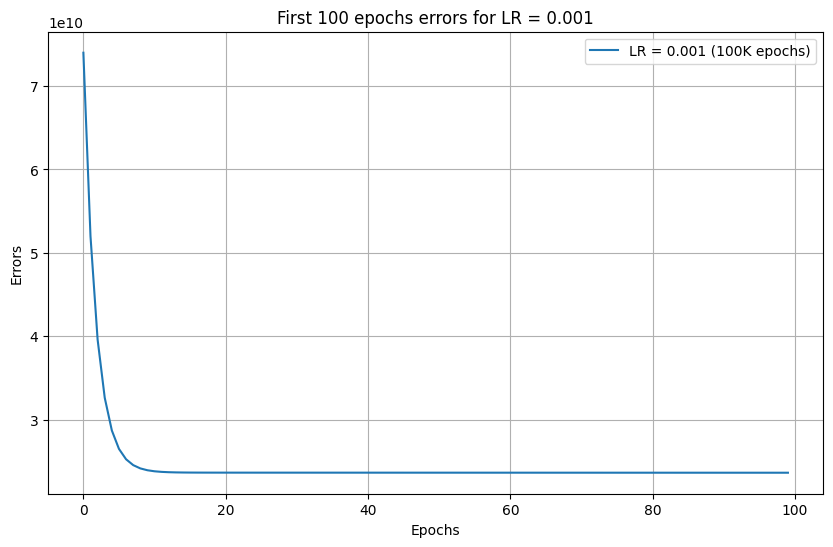

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(error_batch_0001[:100], label = 'LR = 0.001 (100K epochs)')

plt.title('First 100 epochs errors for LR = 0.001')

plt.xlabel('Epochs')
plt.ylabel('Errors')

plt.legend()
plt.grid(True)
plt.show()

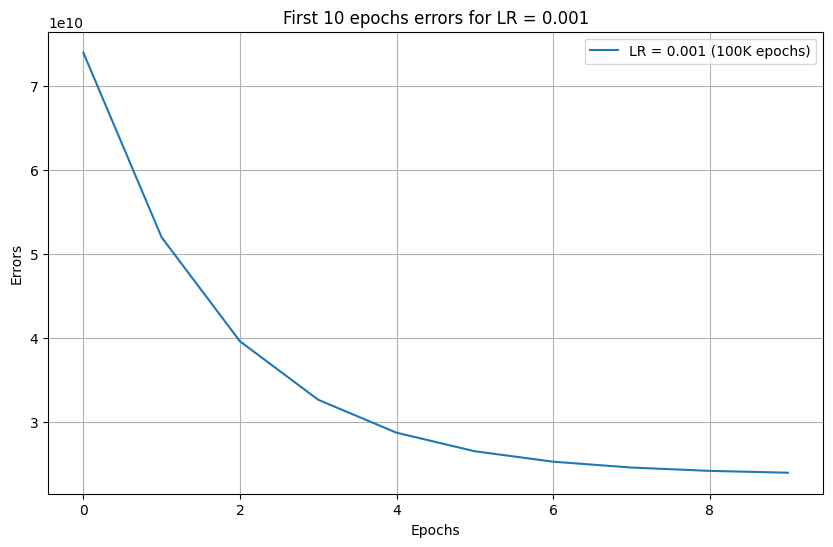

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(error_batch_0001[:10], label = 'LR = 0.001 (100K epochs)')

plt.title('First 10 epochs errors for LR = 0.001')

plt.xlabel('Epochs')
plt.ylabel('Errors')

plt.legend()
plt.grid(True)
plt.show()

Skleran

In [23]:
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(X, y)

LinearRegression()

In [25]:
theta_sklearn = np.expand_dims(np.append(lin_reg.intercept_, lin_reg.coef_), axis = 1)
theta_sklearn

array([[-2091.42055657],
       [  267.24891283]])

In [26]:
y_hat_sklearn = lin_reg.predict(X)
y_hat_sklearn

array([[2719.0598744 ],
       [5391.54900271],
       [6727.79356686],
       ...,
       [2719.0598744 ],
       [2719.0598744 ],
       [3520.80661289]])

In [27]:
mean_squared_error(y, y_hat_sklearn, squared = False)

4662.505766636395

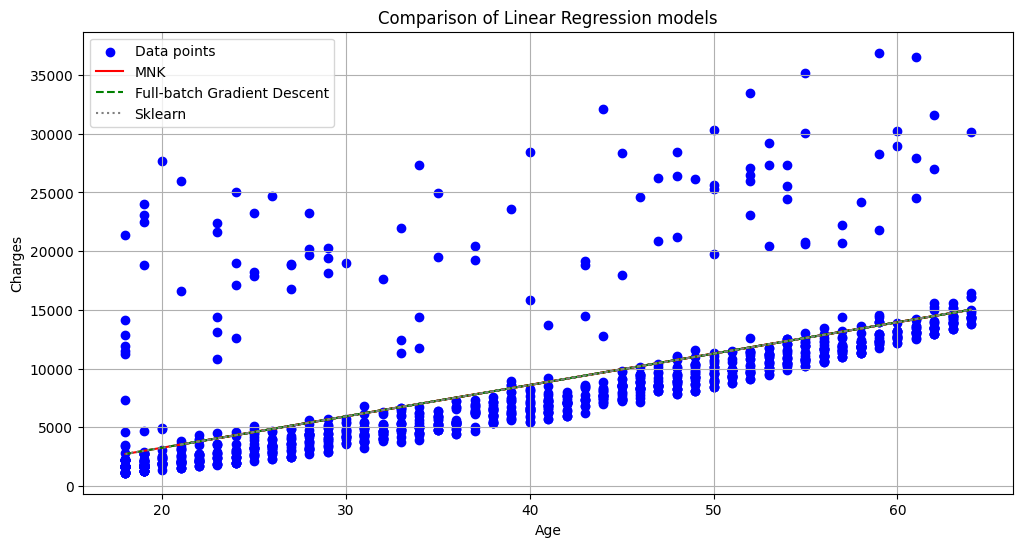

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], y_hat_nmk, color='red', label='MNK', linestyle = 'solid')
plt.plot(X[:, 0], y_hat_full_batch, color='green', label='Full-batch Gradient Descent', linestyle = 'dashed')
plt.plot(X[:, 0], y_hat_sklearn, color='grey', label='Sklearn', linestyle = 'dotted')
plt.title('Comparison of Linear Regression models')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
r2_score(y, y_hat_nmk)

0.3943171632425906

Всіма трьома способами ми отримали ідентичні моделі. Проте, для градієнтного спуску довелось "погратись" з розміром коефіцієнту для рейтенгу навчання та кількістю епох.

Загалом показники є слабкими, але моделі можуть бути прийняті для першої ітерації як предікшен вартості полісу для загального випадку. Як варіант, можна запропонувати використати лінійну регресію для визначення мінімальної вартості страхового полісу для некурців в залежності від віку.

Контролюючі метрики є поганими через "довгий хвіст" для кожного віку. Розуміння природи таких випадків далоб змогу виокремити їх і покращити метрики на типовики представниках не курців для кожного віку.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [29]:
medical_df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [30]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [31]:
X = smoker_df['age']
y = smoker_df['charges']

In [32]:
lin_reg_smok = LinearRegression()
lin_reg_smok.fit(X.to_frame(), y.to_frame())

LinearRegression()

In [33]:
theta_sklearn = np.expand_dims(np.append(lin_reg_smok.intercept_, lin_reg_smok.coef_), axis = 1)
theta_sklearn

array([[20294.12812692],
       [  305.23760211]])

In [34]:
y_hat_sklearn = lin_reg_smok.predict(X.to_frame())
y_hat_sklearn[:5]

array([[26093.642567  ],
       [39218.85945773],
       [28535.54338388],
       [29451.25619021],
       [30672.20659865]])

In [35]:
mean_squared_error(y, y_hat_sklearn, squared = False)

10711.00334810241

In [36]:
r2_score(y, y_hat_sklearn)

0.13558924096084068

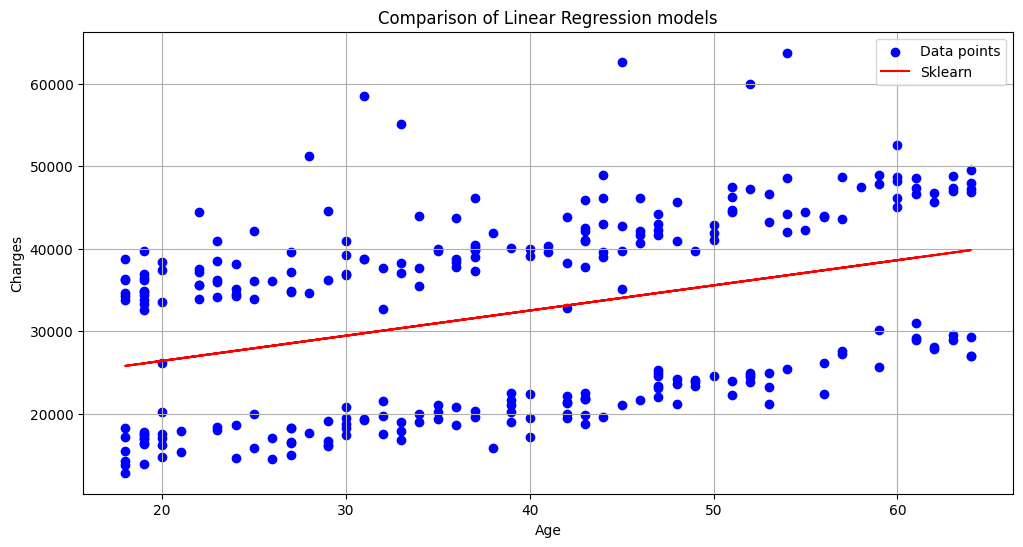

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_hat_sklearn, color='red', label='Sklearn', linestyle = 'solid')
plt.title('Comparison of Linear Regression models')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Як бачимо модель має погані показники контролюючих метрик (RMSE чи R2). Також, з візуалізації маємо, що лінія, яка описує предікшен моделі проходить між двома групами курців (над та під прямою), що говорить про фактично передбачення середнього значення. Розділення групи курців на дві окремі категорії і побудова лін. регресії для кожної окремо дозволило б отримати краші показники